In [11]:
import sys
sys.path.append("../..")
from tools.tools import rect_to_cyl
import pylab as plt
import numpy as np
from galpy.potential import MWPotential2014
from galpy.df import quasiisothermaldf
from galpy.actionAngle import actionAngleAdiabatic
aA= actionAngleAdiabatic(pot=MWPotential2014,c=True)
# set up qdf
# qdf not imported from galpy since I am running a modified galpy in console
qdf= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

In [14]:
qdf_sample = np.load('data/qdf sample cartesian physical.npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T

Populating the interactive namespace from numpy and matplotlib


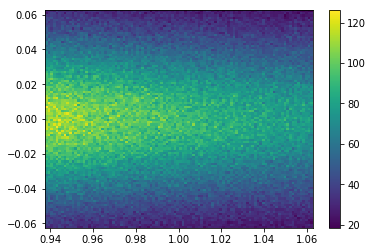

In [15]:
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()

In [14]:
R_linspace = np.linspace(7.5/8., 8.5/8., 40)
z_linspace = np.linspace(-0.5/8., 0.5/8., 40)
Rv, zv = np.meshgrid(R_linspace, z_linspace)
density = qdf.density(Rv, zv)

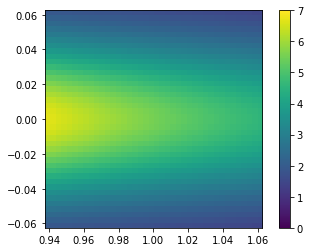

In [33]:
plt.imshow(density, extent = (np.min(R_linspace), np.max(R_linspace),np.min(z_linspace), np.max(z_linspace)), 
           vmin = 0.0, vmax = 7)
plt.colorbar()

In [30]:
(np.min(z)/8., np.max(z)/8.)

(-0.06622654252055644, 0.06623852831090953)

This plot quite conclusively concludes that the sample location interpolation is not good.